In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from pprint import pprint
import seaborn as sns 
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.inspection import PartialDependenceDisplay


## Read Data

In [2]:
# Load data 
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# data dimension
data.shape

(319795, 18)

In [4]:
# data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# missing data
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Preprocess Data

In [6]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
# transform heart disease to binary
data["HeartDisease"] = (data["HeartDisease"]=="Yes").astype(int)
data["HeartDisease"].dtype

dtype('int64')

In [9]:
data["Smoking"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
# transform Smoking to binary
data["Smoking"] = (data["Smoking"]=="Yes").astype(int)
data["Smoking"].dtype

dtype('int64')

In [11]:
data["AlcoholDrinking"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# transform AlcoholDrinking to binary
data["AlcoholDrinking"] = (data["AlcoholDrinking"]=="Yes").astype(int)
data["AlcoholDrinking"].dtype

dtype('int64')

In [13]:
data["Stroke"].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# transform stroke to binary
data["Stroke"] = (data["Stroke"]=="Yes").astype(int)
data["Stroke"].dtype

dtype('int64')

In [15]:
data["DiffWalking"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# transform DiffWalking to binary
data["DiffWalking"] = (data["DiffWalking"]=="Yes").astype(int)
data["DiffWalking"].dtype

dtype('int64')

In [17]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
# Female:1, Male:0
data["Sex"] = (data["Sex"]=="Female").astype(int)
data["Sex"].dtype

dtype('int64')

In [19]:
data["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [20]:
# Map Aging to its categories
def age_mapping(ages):
    return int(ages[:2])
data["AgeCategory"] = data["AgeCategory"].apply(age_mapping)
data["AgeCategory"].unique()

array([55, 80, 65, 75, 40, 70, 60, 50, 45, 18, 35, 30, 25])

In [21]:
data["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [22]:
# Map diabetic to its categories
def diabetic_mapping(answer):
    return int(answer[:2]=="Ye")
data["Diabetic"] = data["Diabetic"].apply(diabetic_mapping)
data["Diabetic"].unique()

array([1, 0])

In [23]:
data["PhysicalActivity"].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
# transform PhysicalActivity to binary
data["PhysicalActivity"] = (data["PhysicalActivity"]=="Yes").astype(int)
data["PhysicalActivity"].dtype

dtype('int64')

In [25]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [26]:
# Map GenHealth to its categories
def genhealth_mapping(answer):
    if answer == "Excellent":
        return 5
    elif answer == "Very good":
        return 4
    elif answer == "Good":
        return 3
    elif answer == "Fair":
        return 2
    else:
        return 1
data["GenHealth"] = data["GenHealth"].apply(genhealth_mapping)
data["GenHealth"].unique()

array([4, 2, 3, 1, 5])

In [27]:
data["Asthma"].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
# transform Asthma to binary
data["Asthma"] = (data["Asthma"]=="Yes").astype(int)
data["Asthma"].dtype

dtype('int64')

In [29]:
data["KidneyDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
# transform KidneyDisease to binary
data["KidneyDisease"] = (data["KidneyDisease"]=="Yes").astype(int)
data["KidneyDisease"].dtype

dtype('int64')

In [31]:
data["SkinCancer"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
# transform KidneyDisease to binary
data["SkinCancer"] = (data["SkinCancer"]=="Yes").astype(int)
data["SkinCancer"].dtype

dtype('int64')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [34]:
# Perform one-hot encoding on the 'race' column
one_hot = pd.get_dummies(data['Race'], dtype=bool)
# Concatenate the original dataframe with the one-hot encoded columns
df_encoded = pd.concat([data, one_hot], axis=1)

df_encoded.drop(columns=["Race"], inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   Sex                             319795 non-null  int64  
 9   AgeCategory                     319795 non-null  int64  
 10  Diabetic                        319795 non-null  int64  
 11  PhysicalActivity                319795 non-null  int64  
 12  GenHealth       

## Plot Correlation

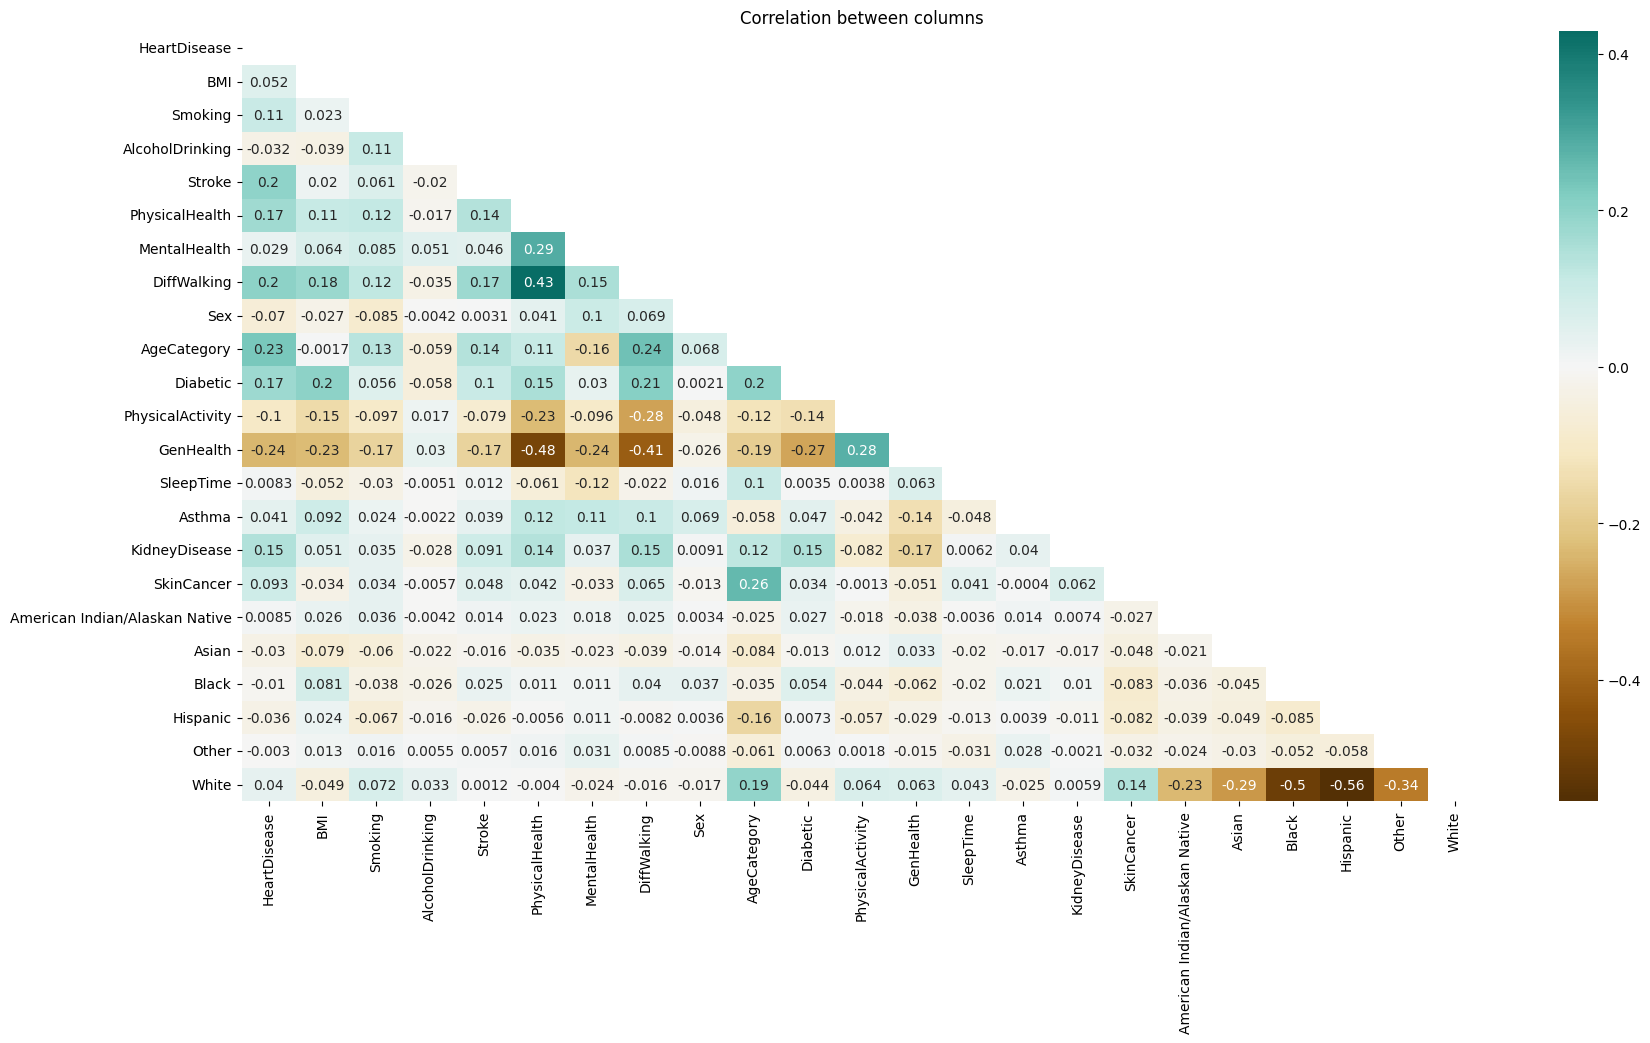

In [35]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))
sns.heatmap(df_encoded.corr(), annot=True, cmap="BrBG", center=0, mask=mask)
plt.title("Correlation between columns")
plt.show()

Notice:
- GenHealth, PhysicalHealth, DiffWalking, PhysicalActivity are highly correlated(>0.4), to reduce multicollinearity, we decided to only keep PhysicalHealth.
- SkinCancer and AgeCategory are correlated, so we decided to drop SkinCancer. 
- MentalHealth, Asthma and PhysicalHealth are correlated, and it might be biased, so we decided to drop SkinCancer and Asthma. 
- We then decided to drop Alcohol, since it is somehow correlated to Smoke and hardly correlated with heart disease.
- We also decided to drop sleep time, since it is hard to give a consistent estimate and it has low correlation with heart disease.
- We also decided to drop race, since this information is sensitive and might be biased.

In [36]:
df_encoded.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'American Indian/Alaskan Native',
       'Asian', 'Black', 'Hispanic', 'Other', 'White'],
      dtype='object')

In [37]:
df_encoded.drop(columns=['SkinCancer', 'American Indian/Alaskan Native', 'Asian', \
                         'Black', 'Hispanic', 'Other', 'White', 'PhysicalActivity', \
                            'GenHealth', 'DiffWalking', 'MentalHealth', 'AlcoholDrinking', \
                              'SleepTime', 'Asthma'], inplace=True)

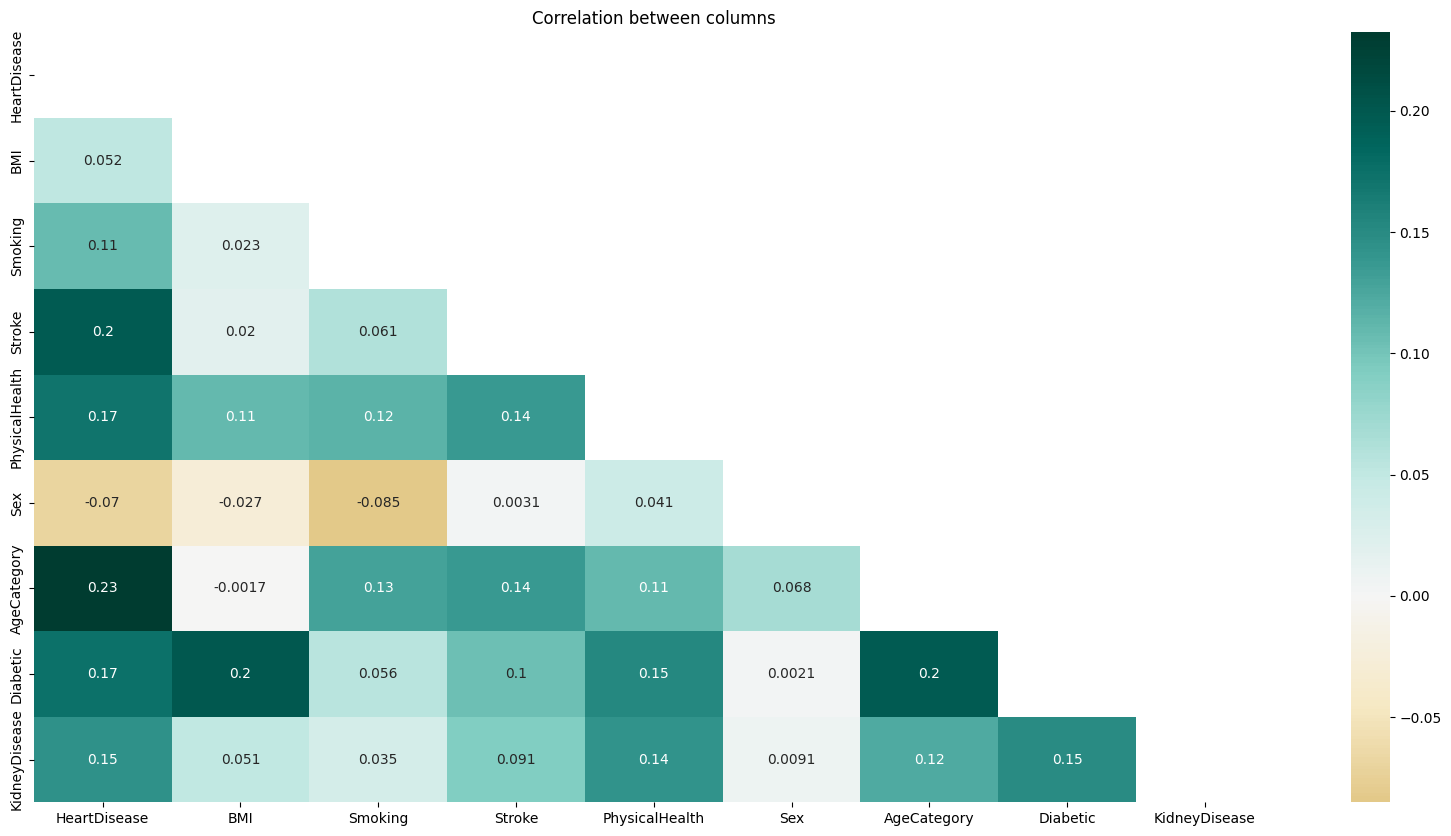

In [38]:
#plot heatmap again
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))
sns.heatmap(df_encoded.corr(), annot=True, cmap="BrBG", center=0, mask=mask)
plt.title("Correlation between columns")
plt.show()

In [49]:
df_encoded.rename(columns={"AgeCategory": "Age"}, inplace=True)

## Save Dataset Before Upsampling

In [50]:
# save unupsampled data to csv
df_encoded.to_csv("for_EDA.csv",index=False)  

In [74]:
#read data
data = pd.read_csv("for_EDA.csv")
data.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,Sex,Age,Diabetic,KidneyDisease
0,0,16.60,1,0,3.0,1,55,1,0
1,0,20.34,0,1,0.0,1,80,0,0
2,0,26.58,1,0,20.0,0,65,1,0
3,0,24.21,0,0,0.0,1,75,0,0
4,0,23.71,0,0,28.0,1,40,0,0


In [52]:
data.shape

(319795, 9)

## Visualizations

In [3]:
# read eda dataset
df_eda = pd.read_csv("for_EDA.csv")
df_eda.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,Sex,Age,Diabetic,KidneyDisease
0,0,16.60,1,0,3.0,1,55,1,0
1,0,20.34,0,1,0.0,1,80,0,0
2,0,26.58,1,0,20.0,0,65,1,0
3,0,24.21,0,0,0.0,1,75,0,0
4,0,23.71,0,0,28.0,1,40,0,0


In [67]:
import os
import logging
from matplotlib import pyplot as plt
import pandas as pd

logger = logging.getLogger()
logger.setLevel(logging.INFO)

def save_figures(data, directory):
    """EDA on dataset and saves generated plots to directory

    Args:
        data: dataframe to do eda
        ddirectoryir: directory of resulting plots to be saved to 

    Returns:
        a list of saved figure paths
    """
    logger.info("EDA Figure in process")
    fig_paths = []
    num_cols = ["BMI","Age","PhysicalHealth"]
    colors = ["lightcoral","lightgreen"] 

    df1 = data[data["HeartDisease"] == 1]
    df2 = data[data["HeartDisease"] == 0]

    # Numerical features
    for feat in num_cols:
        logger.debug("looping through all columns")

        plt.rcParams["figure.figsize"] = [7.50, 3.50]
        plt.rcParams["figure.autolayout"] = True

        fig, axes = plt.subplots(1, 2)

        df1.hist(feat, ax=axes[0], color=colors[0], grid=False) 
        df2.hist(feat, ax=axes[1], color=colors[1], grid=False) 

        axes[0].set_title(feat + " (Heart Disease)")
        axes[1].set_title(feat + " (No Heart Disease)")

        fig_path = os.path.join(directory, f"{feat}.png")
        fig.savefig(fig_path)
        fig_paths.append(fig_path)
        logger.info("EDA Figure saved")
    
    # Categorical features
    cat_cols = ['Smoking', 'Stroke', 'Diabetic', 'KidneyDisease']
    for feat in cat_cols:
        category_counts_h = df1[feat].value_counts()
        category_counts_n = df2[feat].value_counts()
        category_df_h = pd.DataFrame({feat: category_counts_h.index, 'Count': category_counts_h.values})
        category_df_n = pd.DataFrame({feat: category_counts_n.index, 'Count': category_counts_n.values})

        plt.rcParams["figure.figsize"] = [7.50, 3.50]
        plt.rcParams["figure.autolayout"] = True
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        
        # Plot histogram for category_df_h
        axs[0].bar(category_df_h[feat], category_df_h['Count'], color='lightblue')
        axs[0].set_ylabel('Count')
        axs[0].set_title(feat + ' Distribution (Heart Disease)')
        axs[0].set_xticks([0, 1])
        axs[0].set_xticklabels(['No', 'Yes'])

        # Plot histogram for category_df_n
        axs[1].bar(category_df_n[feat], category_df_n['Count'], color='lightblue')
        axs[1].set_ylabel('Count')
        axs[1].set_title(feat + ' Distribution (No Heart Disease)')
        axs[1].set_xticks([0, 1])
        axs[1].set_xticklabels(['No', 'Yes'])

        # Save figure
        fig_path = os.path.join(directory, f"{feat}.png")
        fig.savefig(fig_path)
        fig_paths.append(fig_path)
        logger.info("EDA Figure saved")

    ## Histogram for sex
    category_counts_h = df1['Sex'].value_counts()
    category_counts_n = df2['Sex'].value_counts()
    category_df_h = pd.DataFrame({'Sex': category_counts_h.index, 'Count': category_counts_h.values})
    category_df_n = pd.DataFrame({'Sex': category_counts_n.index, 'Count': category_counts_n.values})

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot histogram for category_df_h
    axs[0].bar(category_df_h['Sex'], category_df_h['Count'], color='lightblue')
    axs[0].set_ylabel('Count')
    axs[0].set_title('Gender Distribution (Heart Disease)')
    axs[0].set_xticks([0, 1])
    axs[0].set_xticklabels(['Male', 'Female'])

    # Plot histogram for category_df_n
    axs[1].bar(category_df_n['Sex'], category_df_n['Count'], color='lightblue')
    axs[1].set_ylabel('Count')
    axs[1].set_title('Gender Distribution (No Heart Disease)')
    axs[1].set_xticks([0, 1])
    axs[1].set_xticklabels(['Male', 'Female'])

    # Save figure
    fig_path = os.path.join(directory, f"Sex.png")
    fig.savefig(fig_path)
    fig_paths.append(fig_path)
    logger.info("EDA Figure saved")

    return fig_paths

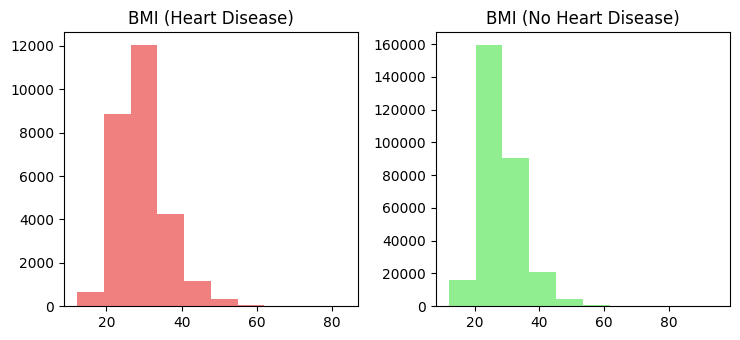

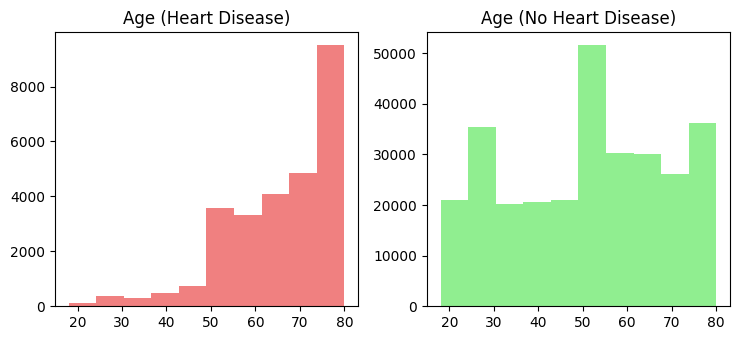

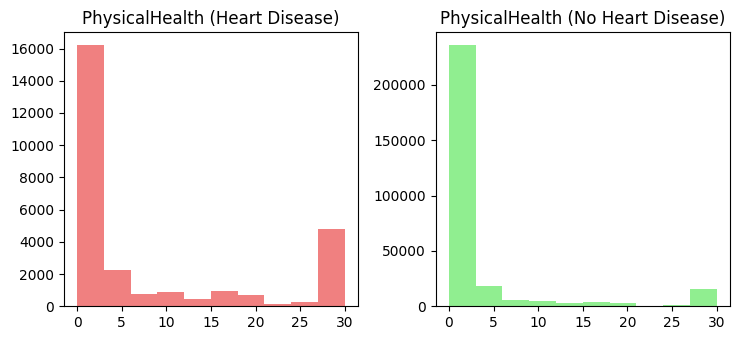

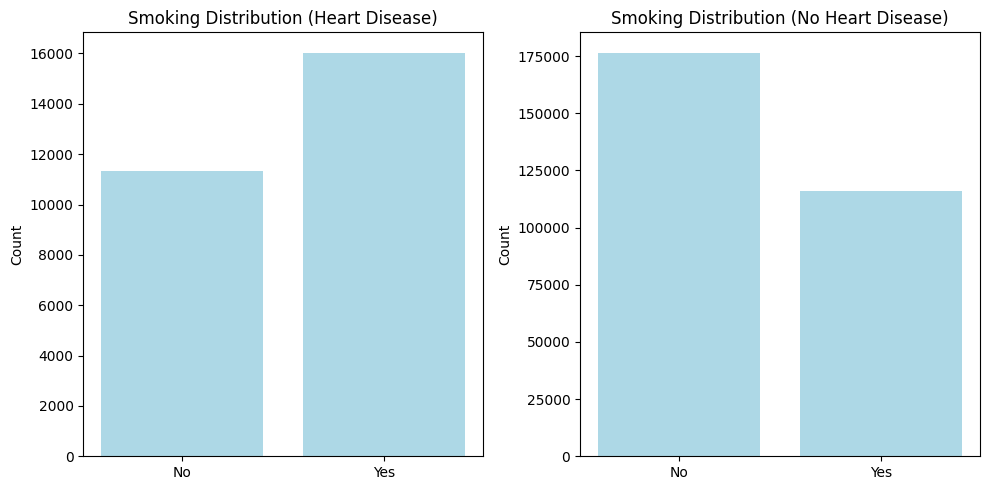

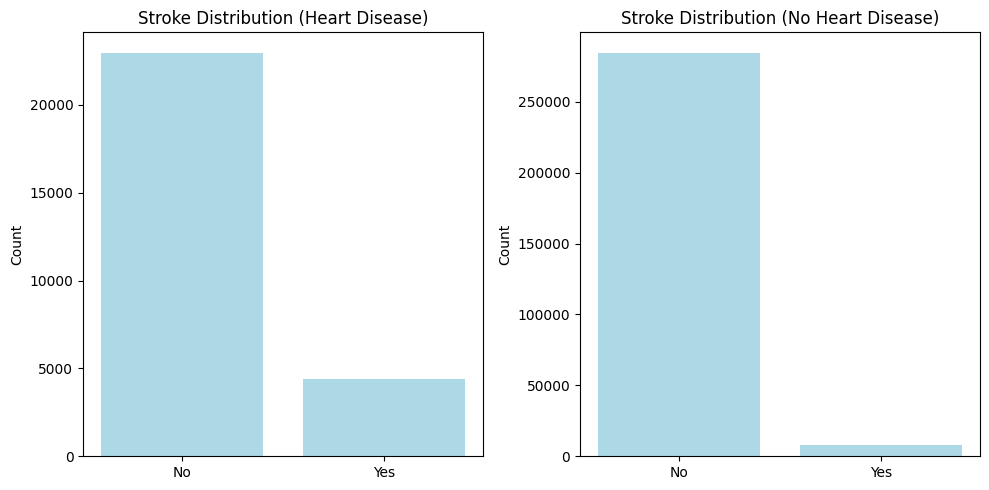

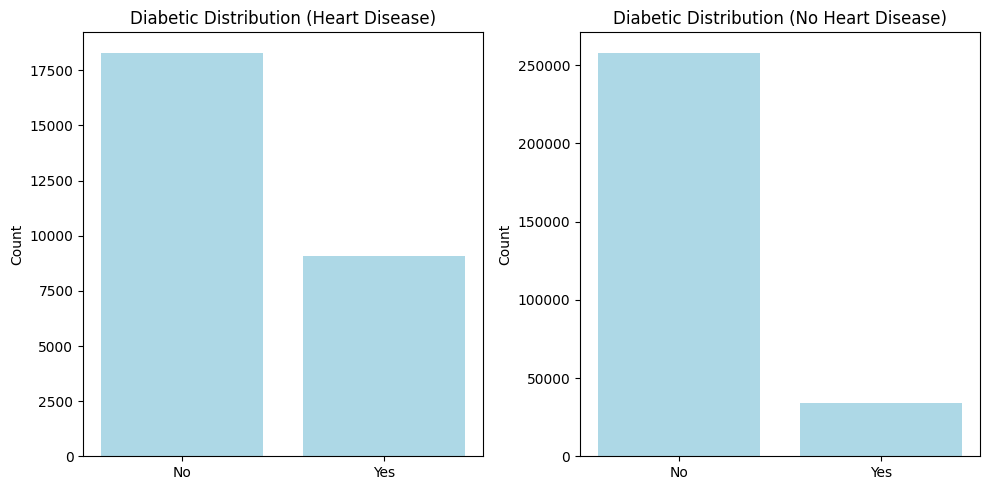

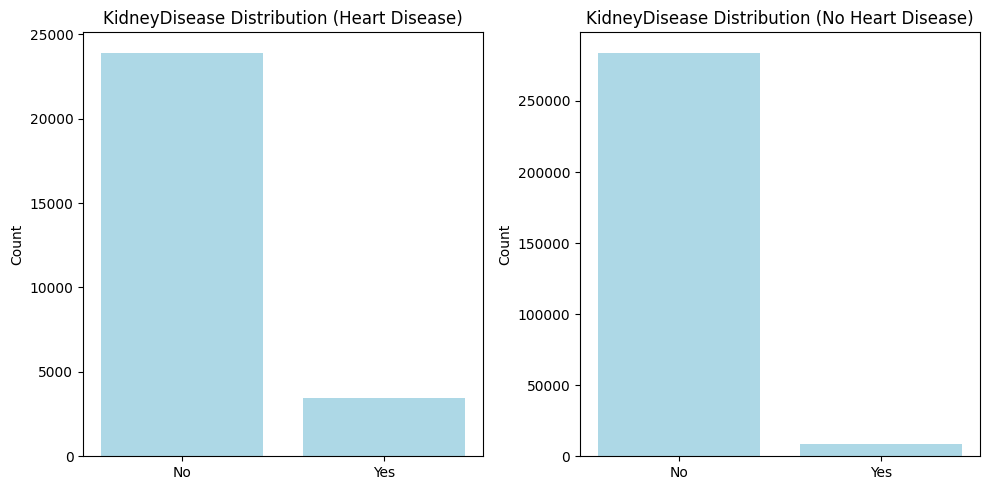

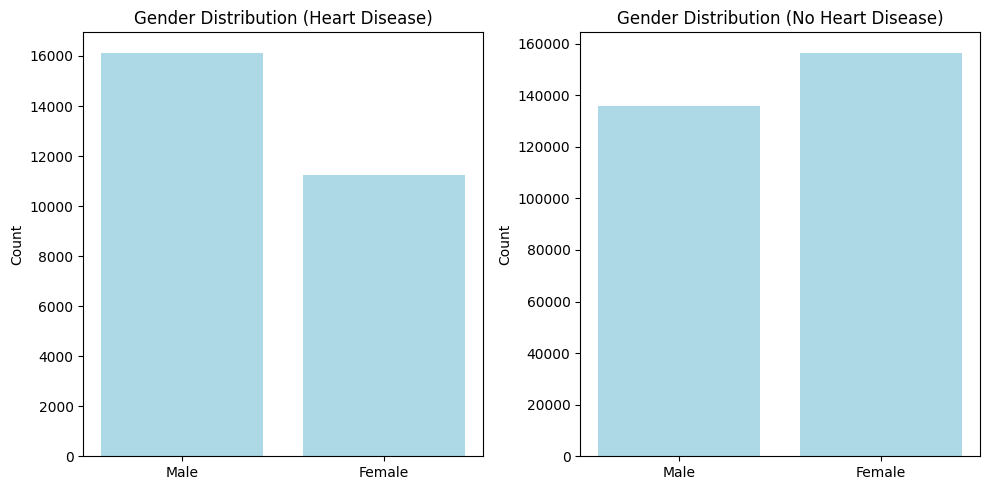

In [68]:
fig_paths = save_figures(df_eda, "eda_figures")

In [69]:
fig_paths

['eda_figures/BMI.png',
 'eda_figures/Age.png',
 'eda_figures/PhysicalHealth.png',
 'eda_figures/Smoking.png',
 'eda_figures/Stroke.png',
 'eda_figures/Diabetic.png',
 'eda_figures/KidneyDisease.png',
 'eda_figures/Sex.png']

## Upsample Data

In [54]:
# data highly imbalanced
data.HeartDisease.value_counts()

HeartDisease
0    292422
1    292422
Name: count, dtype: int64

In [54]:
# Separate the features and the target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Perform oversampling using SMOTE
smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Create a new balanced dataframe
balanced_data = pd.concat([X_oversampled, y_oversampled], axis=1)

# Print the count of each class in the target variable to verify balance
print(balanced_data['HeartDisease'].value_counts())

HeartDisease
0    292422
1    292422
Name: count, dtype: int64


In [52]:
# save unupsampled data to csv
balanced_data.to_csv("balanced_data.csv",index=False) 
#read data
data = pd.read_csv("balanced_data.csv")
data.head()

,BMI,Smoking,Stroke,PhysicalHealth,Sex,Age,Diabetic,KidneyDisease,HeartDisease
0,16.60,1,0,3.0,1,55,1,0,0
1,20.34,0,1,0.0,1,80,0,0,0
2,26.58,1,0,20.0,0,65,1,0,0
3,24.21,0,0,0.0,1,75,0,0,0
4,23.71,0,0,28.0,1,40,0,0,0


In [53]:
data.describe()

,BMI,Smoking,Stroke,PhysicalHealth,Sex,Age,Diabetic,KidneyDisease,HeartDisease
count,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.0
mean,28.800587,0.471502,0.062772,5.384211,0.445365,58.655404,0.196085,0.048531,0.5
std,6.439960,0.499188,0.242553,9.970466,0.497006,17.053214,0.397034,0.214885,0.5
min,12.020000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.0
25%,24.390000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.0
50%,27.736904,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.5
75%,32.029001,1.000000,0.000000,5.000000,1.000000,70.000000,0.000000,0.000000,1.0
max,94.850000,1.000000,1.000000,30.000000,1.000000,80.000000,1.000000,1.000000,1.0


In [56]:
data.shape

(584844, 9)

## Cross-Validation for Random Forest Model

In [6]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 14, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 50]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [61]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time= 1.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time= 1.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time= 1.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 3.0min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 3.0min
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 3.0min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 3.0min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 3.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 3.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=13.5min
[CV] END bootstrap=True, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=13.5min
[CV] END bootstrap=True, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=13.5min
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=15.3min
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=15.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=15.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time= 6.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time= 6.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time= 6.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=21.9min
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=21.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=21.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=22.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=22.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=22.2min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=11.8min
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=11.8min
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=11.8min
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  58.7s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  59.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  58.8s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=11.0min
[CV] END bootstrap=True, max_depth=6, max_

/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=11.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 3.5min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 3.5min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 3.6min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=20.5min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=20.5min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=20.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=14.9min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=14.9min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=14.9min
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 2.1min
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 2.2min
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 2.2min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=12.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=12.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=12.7min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=10.7min
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=10.7min
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=10.7min
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 5.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 5.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 5.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 6.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 6.8min
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 6.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=37.7min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=37.6min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=37.7min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=17.6min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=17.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=17.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 9.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 9.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 9.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time= 5.2min
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time= 5.2min
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time= 5.2min
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 2.2min
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 2.2min
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 2.2min
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=15.1min
[CV] END bootstrap=False, max_depth=12, 

/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 3.2min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 6.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 7.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 7.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 7.0min
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 7.0min
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 7.0min
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 4.1min
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 4.1min
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 4.2min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=37.1min
[CV] END bootstrap=True, max_depth=None, m

/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 3.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=32.1min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=32.1min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=32.1min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time= 7.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time= 7.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time= 7.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=21.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=21.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=21.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 1.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 1.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 1.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=12.2min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=12.2min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=12.2min
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 2.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 2.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 2.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 6.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 6.0min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 6.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 5.5min
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 5.5min
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 5.5min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=26.7min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=26.7min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=26.7min
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time= 6.7min
[CV] END bootstrap=True, max_depth=4, 

/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=17.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=17.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=19.4min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=19.4min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=19.4min
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.4min
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.4min
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.5min
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 4.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 4.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 4.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 9.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 9.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 9.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=17.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=17.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=17.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 3.7min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 3.7min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 3.7min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=20.1min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=20.1min
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=20.1min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=17.1min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=17.0min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=16.9min
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 4.8min
[CV] END bootstrap=False, max

/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=11.8min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=11.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=12.7min
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=12.7min
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=12.7min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=31.8min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=31.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time=32.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 3.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 3.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 3.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=20.9min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=20.9min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=20.9min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 4.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 4.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time= 4.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time= 2.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time= 2.2min
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time= 2.2min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 4.4min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 4.4min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 4.5min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=15.2min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=15.2min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=15.1min
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 4.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 4.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 4.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=19.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=19.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=19.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 6.9min
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 6.9min
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 7.0min
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 1.8min
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=22.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=22.0min
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=22.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=17.5min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=17.4min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=17.5min
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time= 7.5min
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time= 7.5min
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time= 7.5min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=26.3min
[CV] END bootstrap=False, max_depth=No

/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 9.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 9.4min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 8.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 8.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 9.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 7.2min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 7.2min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 7.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=24.5min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=24.4min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=24.5min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 4.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 4.3min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 4.3min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=11.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=11.0min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=11.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time= 9.4min
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time= 9.3min
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time= 9.3min
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 4.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 4.1min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 4.2min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 5.2min
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 5.2min
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 5.2min
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time= 5.5min
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time= 5.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time= 5.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=18.0min
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=18.0min
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=18.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=13.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=13.6min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=13.5min
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 4.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 4.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 4.6min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=27.9min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=27.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=27.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=13.9min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=14.0min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=14.0min
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 5.7min
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 5.8min
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 5.8min
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time= 8.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time= 8.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time= 8.5min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=11.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=11.0min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=11.0min
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 9.9min
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 9.8min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 9.9min


/Users/wangyifei/Desktop/EDA/.venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=44.3min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=44.3min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=44.3min
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=13.8min
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 8.4min
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 8.5min
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 8.4min
[CV] END bootstrap=False, max_dept

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [62]:
best_random = rf_random.best_params_

In [28]:
rf_random.best_params_ 

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 200}


## Train and Evaluate Model

In [8]:
best_rf = RandomForestClassifier(n_estimators=200, min_samples_split = 50, min_samples_leaf = 50, max_features = 'sqrt',max_depth = None,bootstrap = False)
bf = best_rf.fit(X_train,y_train)

In [59]:
y_pred = best_rf.predict(X_test)

In [64]:
y_pred[:20]

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [65]:
y_test[:20]

498280    1
103928    0
134719    0
6075      0
547424    1
39474     1
456346    1
52880     0
3721      0
402746    1
388131    1
400936    1
83766     0
383321    1
414893    1
401513    1
482866    1
429567    1
342489    1
196666    0
Name: HeartDisease, dtype: int64

In [66]:
X_test.head(20)

,BMI,Smoking,Stroke,PhysicalHealth,Sex,Age,Diabetic,KidneyDisease
498280,26.102053,1,0,30.0,1,80,1,0
103928,32.320000,1,0,30.0,0,70,1,0
134719,24.560000,0,0,0.0,1,25,0,0
6075,37.450000,0,0,0.0,1,45,1,0
547424,20.942119,0,0,2.0,1,80,0,0
39474,30.830000,0,0,30.0,0,75,1,1
456346,26.370000,0,0,20.0,1,80,0,0
52880,23.490000,0,0,2.0,1,40,0,0
3721,43.260000,0,0,3.0,1,60,1,0
402746,22.774774,0,0,0.0,0,80,0,0


In [60]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred)))
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))

Accuracy Score is 0.77575
       0      1
0  42976  15509
1  10721  47763


In [11]:
print('F1 Score is {:.5}'.format(f1_score(y_test,y_pred)))

F1 Score is 0.78457


In [12]:
print('Recall is {:.5}'.format(recall_score(y_test,y_pred)))

Recall is 0.81668


In [13]:
print('Precision is {:.5}'.format(precision_score(y_test,y_pred)))

Precision is 0.75488


In [14]:
feature_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns[:41]).sort_values(ascending=False)
feature_imp

Age               0.473350
PhysicalHealth    0.174418
BMI               0.147839
Sex               0.080597
Diabetic          0.055620
Stroke            0.031967
Smoking           0.030525
KidneyDisease     0.005684
dtype: float64

In [15]:
X_train.shape

(467875, 8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


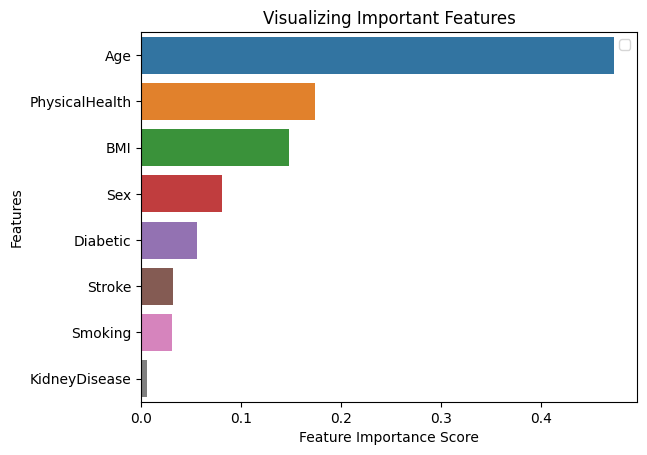

In [16]:
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()